To ignore warnings in Jupyter Notebook, use the warnings module in Python. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd # import pandas for data analysis and manipulation
import numpy as np # import numpy for array operations & numerical processing
import matplotlib.pyplot as plt # import matplotlib for data visualization and plotting

In [3]:
df = pd.read_csv('Height-Weight-Data.csv') # load the dataset

In [4]:
df.head() # read five values of the dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.shape # It's returns the dimensions of the dataset as a tuple format like (rows, column)

(3501, 2)

In [6]:
df.tail() # read last five values of the dataset

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df[100:125] #To access specific rows in a DataFrame using index values

,Height,Weight
100,70.052177,200.818737
101,66.743605,167.739775
102,66.274329,154.395625
103,68.328448,177.984729
104,70.075888,183.938857
105,68.732988,179.204782
106,67.556051,158.567987
107,66.253633,166.503532
108,69.182203,171.983678
109,67.609105,174.364182


Checking if any null values exits in my dataset

In [8]:
df.isnull().values.any() # No Null values exits in my dataset that's why output will be False

False

##### create a scatter plot with height values on the x-axis and weight values on the y-axis. The plot will be titled 'Height vs. Weight'.

Text(0.5, 1.0, 'Height vs. Weight')

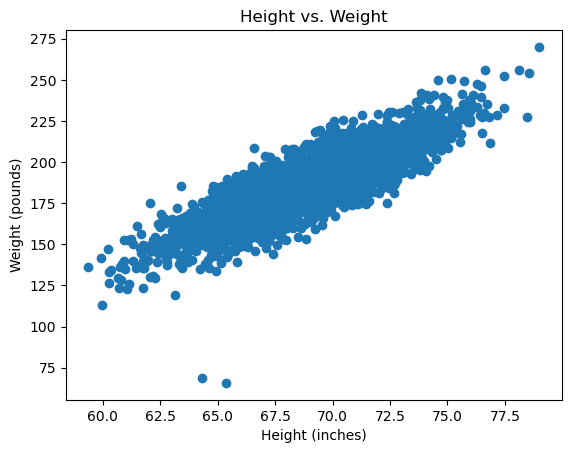

In [9]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs. Weight')

- sum(df.Height) calculates the sum of all the values in the 'Height' column of the DataFrame df.
- df.shape[0] retrieves the number of rows in the DataFrame df using the shape attribute and indexing [0].

In [10]:
mean_height = sum(df.Height) / df.shape[0] # or df.Height.mean()
mean_height 

69.02441087268797

In [11]:
df.Weight.mean() # mean of the weight values

186.89125797946284

To split the data into training and testing sets for your linear regression analysis

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Defining the feature and predicted class
feature_column = ['Height']
predicted_class = ['Weight']

In [14]:
# Extracting the 'Height' and 'Weight' data from the DataFrame as NumPy arrays
height = df[feature_column].values
weight = df[predicted_class].values

In [15]:
# Specifying the test size for splitting 20%
split_test_size = 0.20

Setting random_state = 42 is to guarantee that the splitting happens from the same place every time the program is run.

In [16]:
# Splitting the data using scikit-learn train_test_split function
height_train, height_test, weight_train, weight_test = train_test_split(
    height, weight, test_size=split_test_size, random_state=42)

### Is the splitting of the dataset really 70-30? Let's check

In [17]:
# Calculate the percentages of data in the training and test sets
train_percentage = (len(height_train) / len(df.index)) * 100
test_percentage = (len(height_test) / len(df.index)) * 100

# Print the percentages
print("{0:.2f}% in training set".format(train_percentage))
print("{0:.2f}% in test set".format(test_percentage))

79.98% in training set
20.02% in test set


- the values 0 and 1 represent the x-index positions of the labels
- the first occurrence of train_percentage represents the y-coordinate or height of the 'Training Set' bar where the label will be positioned.
- The second occurrence of train_percentage within plt.text() is the actual text or label content that will be displayed on top of the bar. 
- ha='center':This sets the horizontal alignment of the text label to the center. change ha = "left", ha = "right"
- va='bottom': This sets the vertical alignment of the text label to the bottom.  change va = "top"

Text(1, 20.022850614110254, '20.02%')

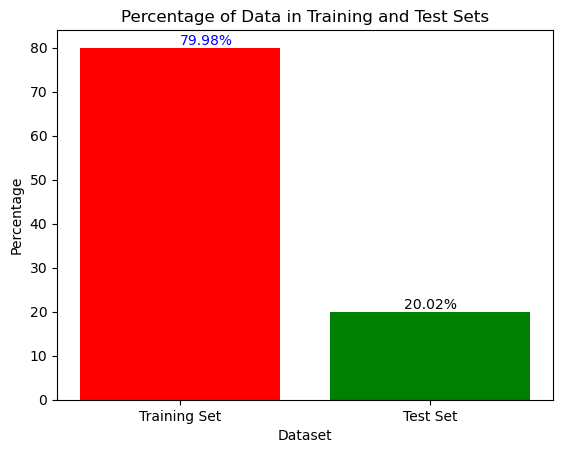

In [18]:
# Create a bar plot with color changes
plt.bar(['Training Set', 'Test Set'], [train_percentage, test_percentage], color=['Red', 'Green'])
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.title('Percentage of Data in Training and Test Sets')

# Add labels to the bars
plt.text(0, train_percentage, "{0:.2f}%".format(train_percentage), ha='left', va='bottom', color='blue')
plt.text(1, test_percentage, "{0:.2f}%".format(test_percentage), ha='center', va='bottom', color='black')

# Model training using Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr_model = LinearRegression()

In [20]:
# Fit the model to the training data
lr_model.fit(height_train, weight_train)

LinearRegression()

In [21]:
# Print the coefficients (slope and intercept)
print("Slope:", lr_model.coef_[0][0])
print("Intercept:", lr_model.intercept_[0])

Slope: 5.962329125895916
Intercept: -224.77329699393547


In [22]:
# This returns array of predicted results, predicted from the train data
prediction_from_trained_data = lr_model.predict(height_train)
prediction_from_trained_data

array([[183.6928432 ],
       [214.63163322],
       [207.43388672],
       ...,
       [175.47360317],
       [187.07155869],
       [174.17725431]])

In [23]:
# predicted from the test data
prediction_from_test_data = lr_model.predict(height_test)
prediction_from_test_data

array([[194.52602871],
       [176.32221443],
       [187.47569079],
       [235.28479353],
       [208.55066489],
       [188.65262141],
       [175.7815701 ],
       [185.78481771],
       [173.36073152],
       [202.75084787],
       [174.60458851],
       [218.38085184],
       [201.04996482],
       [197.93188467],
       [182.77830568],
       [176.85410589],
       [202.8203235 ],
       [200.51903044],
       [174.19532494],
       [185.6276918 ],
       [178.87851946],
       [165.69822081],
       [171.96478941],
       [177.26568654],
       [188.00332531],
       [175.87446611],
       [190.31072367],
       [182.86506281],
       [179.50428904],
       [163.93926807],
       [170.69319143],
       [197.17335484],
       [171.52507998],
       [188.04079205],
       [200.6829025 ],
       [189.44894806],
       [167.1960159 ],
       [202.30641997],
       [172.72262624],
       [169.58152465],
       [199.39304483],
       [167.75318095],
       [181.3692217 ],
       [211

Specifying specific 'Height' values for prediction

In [24]:
height_values = [[70.12], [72.45], [68.59]]

Predicting 'Weight' values for the specified 'Height' values

In [25]:
weight_predictions = lr_model.predict(height_values)
weight_predictions

array([[193.30522131],
       [207.19744818],
       [184.18285775]])

Assigning coefficient and intercept values

In [26]:
m = lr_model.coef_
c = lr_model.intercept_

In [27]:
# so apply to formula y = mx + c
y = m * 70.12 + c
y

array([[193.30522131]])

In [28]:
# Create a copy of the DataFrame with changed column names
df_copy = df.rename(columns={'Weight': 'Actual Weight'})

In [29]:
df_copy['Predicted Weight'] = lr_model.predict(df[['Height']])
df_copy

,Height,Actual Weight,Predicted Weight
0,73.847017,241.893563,215.526923
1,68.781904,162.310473,185.327053
2,74.110105,212.740856,217.095543
3,71.730978,220.042470,202.910405
4,69.881796,206.349801,191.884970
...,...,...,...
3496,69.296830,185.649086,188.397211
3497,70.542201,210.198845,195.822525
3498,73.912549,202.429960,215.917648
3499,67.396021,144.277671,177.063961


# Draw the best fit line

Text(0.5, 1.0, 'Height vs. Weight from the Training Dataset')

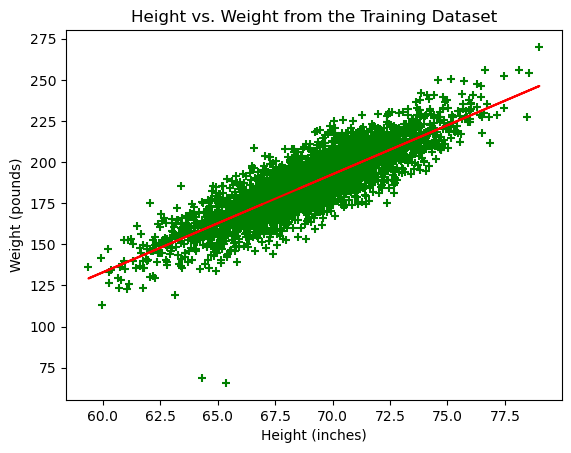

In [30]:
# Best fit line for training dataset
plt.scatter(df['Height'], df['Weight'], color='green', marker='+')
plt.plot(height_train, lr_model.predict(height_train), color='red')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs. Weight from the Training Dataset')

Text(0.5, 1.0, 'Height vs. Weight from the Test Dataset')

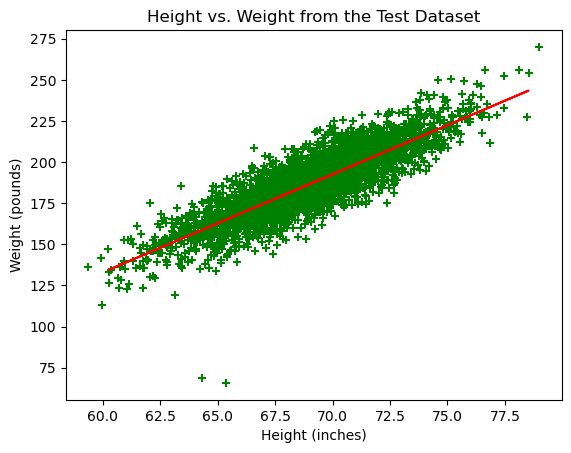

In [31]:
# Best fit line for testing dataset
plt.scatter(df['Height'], df['Weight'], color='green', marker='+')
plt.plot(height_test, lr_model.predict(height_test), color='red')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs. Weight from the Test Dataset')

To calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for evaluating the performance of a regression model

#### Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Training part

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(weight_train, lr_model.predict(height_train))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(weight_train, lr_model.predict(height_train))

# Print the calculated MSE and MAE values
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 108.20615780522523
Mean Absolute Error (MAE): 8.076328825385255


#### Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Testing part

In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(weight_test, lr_model.predict(height_test))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(weight_test, lr_model.predict(height_test))

# Print the calculated MSE and MAE values
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 97.2175051329933
Mean Absolute Error (MAE): 8.040126312816263
